# 1.3.2 RFM Principle

- I'll implement here the RFM principle to classify the customers in this database. This part is inspired by the work of Susan Li. RFM stands for Recency, Frequency and Monetary. It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

In [1]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [176]:
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
import random 
import pickle

In [100]:
import pandas as pd
df_cleaned = pd.read_csv('df_w_cleaned.csv', index_col=0)

In [101]:
import datetime as dt

In [102]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [103]:
df_cleaned.shape

(396370, 10)

In [104]:
df_cleaned[df_cleaned.CustomerID==17850]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,0,11.10


In [214]:
le = LabelEncoder()
le.fit(df_cleaned['Country'])

LabelEncoder()

In [215]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [216]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [217]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)

In [218]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,5327.79,372.0,373.0,34,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,5327.79,372.0,373.0,34,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8


In [105]:
df_cleaned['InvoiceDate'].min()

'2010-12-01 08:26:00'

In [106]:
df_cleaned['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [107]:
# I'll just fix the date to be one day after the last entry in the databse

NOW = dt.datetime(2011,12,10)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [108]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"


rfmTable = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [113]:
rfmTable.head()

,TotalPrice,CustomerID,InvoiceDate,Recency
InvoiceNo,,,,
536365,139.12,17850,2010-12-01 08:26:00,373.0
536366,22.20,17850,2010-12-01 08:28:00,373.0
536367,278.73,13047,2010-12-01 08:34:00,373.0
536368,70.05,13047,2010-12-01 08:34:00,373.0
536369,17.85,13047,2010-12-01 08:35:00,373.0


In [114]:
rfmTable.shape

(18405, 4)

In [110]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")

rfmTable.head()

,TotalPrice,CustomerID,InvoiceDate,Recency
InvoiceNo,,,,
536365,139.12,17850,2010-12-01 08:26:00,373.0
536366,22.20,17850,2010-12-01 08:28:00,373.0
536367,278.73,13047,2010-12-01 08:34:00,373.0
536368,70.05,13047,2010-12-01 08:34:00,373.0
536369,17.85,13047,2010-12-01 08:35:00,373.0


In [111]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [112]:
rfmTable_final.shape

(4335, 4)

In [115]:
rfmTable_final.columns = ["monetary_value","min_recency", "max_recency","frequency"]

In [116]:
rfmTable_final.head()

,monetary_value,min_recency,max_recency,frequency
CustomerID,,,,
12346,0.00,325.0,325.0,1
12347,4310.00,2.0,367.0,7
12348,1437.24,75.0,358.0,4
12349,1457.55,18.0,18.0,1
12350,294.40,310.0,310.0,1


In [120]:
rfmTable_final.shape

(4335, 4)

In [219]:
first_customer = df_cleaned[df_cleaned['CustomerID']==12747]
first_customer.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month,Weekday,Day,Hour
75053,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747,35,0,30.60,4196.01,2.0,369.0,11,111,12,6,5,15
75054,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747,35,0,15.30,4196.01,2.0,369.0,11,111,12,6,5,15
75055,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747,35,0,27.04,4196.01,2.0,369.0,11,111,12,6,5,15
75056,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747,35,0,39.60,4196.01,2.0,369.0,11,111,12,6,5,15
75057,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747,35,0,32.70,4196.01,2.0,369.0,11,111,12,6,5,15


In [118]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [119]:
quantiles

{'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'max_recency': {0.25: 112.0, 0.5: 248.0, 0.75: 326.0},
 'min_recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'monetary_value': {0.25: 299.65, 0.5: 654.6, 0.75: 1610.305}}

In [121]:
segmented_rfm = rfmTable_final

In [122]:
segmented_rfm.shape

(4335, 4)

In [39]:
rfmTable_final.head()

,monetary_value,min_recency,max_recency,frequency
CustomerID,,,,
12346,0.00,325.0,325.0,1
12347,4310.00,2.0,367.0,7
12348,1437.24,75.0,358.0,4
12349,1457.55,18.0,18.0,1
12350,294.40,310.0,310.0,1


In [123]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

- Here we'll apply a score on each feature of RFM

In [124]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346,0.00,325.0,325.0,1,4,4,4
12347,4310.00,2.0,367.0,7,1,1,1
12348,1437.24,75.0,358.0,4,3,2,2
12349,1457.55,18.0,18.0,1,2,4,2
12350,294.40,310.0,310.0,1,4,4,4


In [125]:
segmented_rfm.shape

(4335, 7)

- Finally we'll set a score for each customer in the database.

In [126]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,0.00,325.0,325.0,1,4,4,4,444
12347,4310.00,2.0,367.0,7,1,1,1,111
12348,1437.24,75.0,358.0,4,3,2,2,322
12349,1457.55,18.0,18.0,1,2,4,2,242
12350,294.40,310.0,310.0,1,4,4,4,444


In [127]:
segmented_rfm.shape

(4335, 8)

In [128]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False)

,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646,278742.02,1.0,354.0,73,1,1,1,111
18102,259657.30,0.0,367.0,60,1,1,1,111
17450,193577.63,8.0,367.0,46,1,1,1,111
14911,129189.80,1.0,373.0,198,1,1,1,111
14156,113889.75,9.0,371.0,54,1,1,1,111
17511,88353.14,2.0,373.0,31,1,1,1,111
16684,65920.12,4.0,358.0,28,1,1,1,111
13694,63067.14,3.0,373.0,50,1,1,1,111
15311,59741.73,0.0,373.0,91,1,1,1,111


 - Here we have an example of customers with a score of 111 which means that they are classified as our best customers.

In [129]:
segmented_rfm.head(5)

,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,0.00,325.0,325.0,1,4,4,4,444
12347,4310.00,2.0,367.0,7,1,1,1,111
12348,1437.24,75.0,358.0,4,3,2,2,322
12349,1457.55,18.0,18.0,1,2,4,2,242
12350,294.40,310.0,310.0,1,4,4,4,444


In [130]:
segmented_rfm = segmented_rfm.reset_index()


In [220]:
segmented_rfm.head()

,CustomerID,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile,RFMScore
0,12346,0.00,325.0,325.0,1,4,4,4,444
1,12347,4310.00,2.0,367.0,7,1,1,1,111
2,12348,1437.24,75.0,358.0,4,3,2,2,322
3,12349,1457.55,18.0,18.0,1,2,4,2,242
4,12350,294.40,310.0,310.0,1,4,4,4,444


In [134]:
segmented_rfm.shape

(4335, 9)

In [136]:
df_cleaned.shape

(396370, 10)

In [221]:
df_cleaned.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,5327.79,372.0,373.0,34,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8


### We don't need the quartiles anymore, let's drop them.

In [98]:
segmented_rfm.tail()

,CustomerID,monetary_value,min_recency,max_recency,frequency,RFMScore
0,12346,0.00,325.0,325.0,1,444
1,12347,4310.00,2.0,367.0,7,111
2,12348,1437.24,75.0,358.0,4,322
3,12349,1457.55,18.0,18.0,1,242
4,12350,294.40,310.0,310.0,1,444


In [137]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [139]:
df_cleaned.shape

(396370, 18)

In [138]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,r_quartile,f_quartile,m_quartile,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,5327.79,372.0,373.0,34,4,1,1,411
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,4,1,1,411
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,5327.79,372.0,373.0,34,4,1,1,411
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,4,1,1,411
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,4,1,1,411


In [140]:
df_cleaned.columns

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country', u'QuantityCanceled',
       u'TotalPrice', u'monetary_value', u'min_recency', u'max_recency',
       u'frequency', u'r_quartile', u'f_quartile', u'm_quartile', u'RFMScore'],
      dtype='object')

In [141]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

In [142]:
df_cleaned.columns

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country', u'QuantityCanceled',
       u'TotalPrice', u'monetary_value', u'min_recency', u'max_recency',
       u'frequency', u'RFMScore'],
      dtype='object')

In [143]:
df_cleaned.shape

(396370, 15)

In [144]:
df_cleaned[df_cleaned['RFMScore']=='444']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore
5200,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747,United Kingdom,0,79.60,79.60,373.0,373.0,1,444
6728,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791,Netherlands,0,177.60,177.60,373.0,373.0,1,444
6999,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908,United Kingdom,0,19.05,243.28,373.0,373.0,1,444
7000,536409,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-01 11:45:00,3.75,17908,United Kingdom,0,3.75,243.28,373.0,373.0,1,444
7001,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,0,4.95,243.28,373.0,373.0,1,444
7002,536409,22785,SQUARECUSHION COVER PINK UNION FLAG,1,2010-12-01 11:45:00,6.75,17908,United Kingdom,0,6.75,243.28,373.0,373.0,1,444
7003,536409,22975,SPACEBOY CHILDRENS EGG CUP,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,0,1.25,243.28,373.0,373.0,1,444
7004,536409,22972,CHILDREN'S SPACEBOY MUG,1,2010-12-01 11:45:00,1.65,17908,United Kingdom,0,1.65,243.28,373.0,373.0,1,444
7005,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,0,2.10,243.28,373.0,373.0,1,444
7006,536409,22568,FELTCRAFT CUSHION OWL,1,2010-12-01 11:45:00,3.75,17908,United Kingdom,0,3.75,243.28,373.0,373.0,1,444


In [ ]:
df_cleaned.to_csv('')

## 1.3.3 Time Features

- I'll now create some time features, although I might not use them. It could be interesting to see if there are any paterns due to seasonality.

In [145]:
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [146]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396370 entries, 0 to 396369
Data columns (total 16 columns):
InvoiceNo           396370 non-null int64
StockCode           396370 non-null object
Description         396370 non-null object
Quantity            396370 non-null int64
InvoiceDate         396370 non-null datetime64[ns]
UnitPrice           396370 non-null float64
CustomerID          396370 non-null int64
Country             396370 non-null object
QuantityCanceled    396370 non-null int64
TotalPrice          396370 non-null float64
monetary_value      396370 non-null float64
min_recency         396370 non-null float64
max_recency         396370 non-null float64
frequency           396370 non-null int64
RFMScore            396370 non-null object
Month               396370 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(4)
memory usage: 51.4+ MB


In [86]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [147]:
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [148]:
df_cleaned.shape

(396370, 16)

In [149]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,5327.79,372.0,373.0,34,411,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,5327.79,372.0,373.0,34,411,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12


In [150]:
df_cleaned.shape

(396370, 16)

In [151]:
df_cleaned['Month'].value_counts()

11    64312
10    49369
12    43301
9     39869
5     28209
6     27079
3     27057
8     26905
7     26721
4     22556
1     21140
2     19852
Name: Month, dtype: int64

In [152]:
df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].map(lambda x: x.weekday())
df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)

In [153]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,5327.79,372.0,373.0,34,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,5327.79,372.0,373.0,34,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5327.79,372.0,373.0,34,411,12,2,1,8


# 1.4 Product categories

In [158]:
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

('TF_IDF_matrix :', (3871, 1694), 'of', dtype('float64'))


In [159]:
X

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'LETTER "W" BLING KEY RING', 'LETTER "Z" BLING KEY RING'], dtype=object)

In [164]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

('TF_IDF_embedded :', (3871L, 100L), 'of', dtype('float64'))


In [165]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

In [341]:
score_tfidf


[0.038128934149607635,
 0.087079794699865778,
 0.12334540862468563,
 0.14588091043054074,
 0.16072018802753804,
 0.17614080317555214,
 0.18659174515013846,
 0.19056245448376119,
 0.18893062294797364,
 0.18507965267134097,
 0.19059763891567014,
 0.18970079414662858,
 0.1938741657267381,
 0.19294369909483156,
 0.18791638945189951]

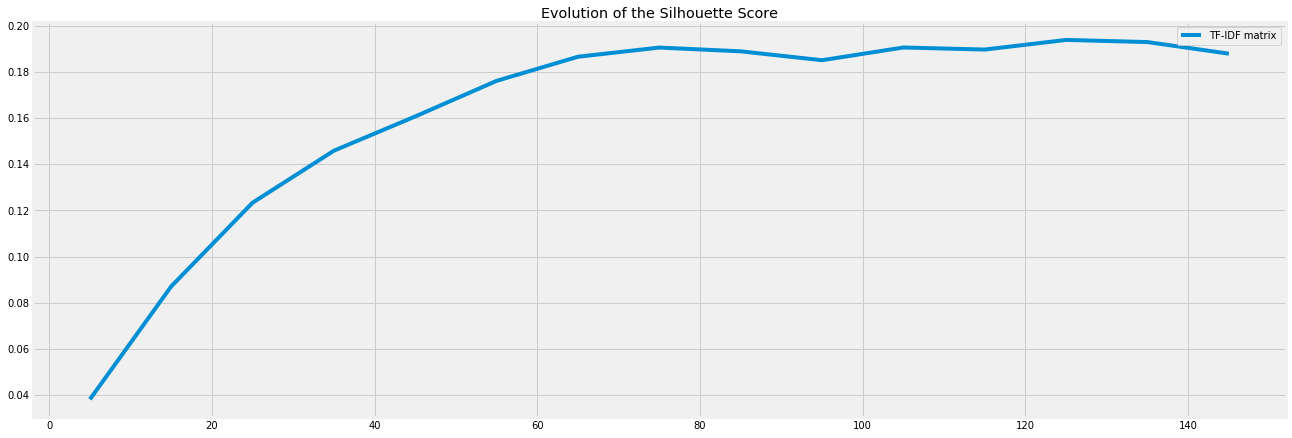

In [166]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

- The highest value for the silhouette score is when there are 135 clusters. So we'll chose this value.

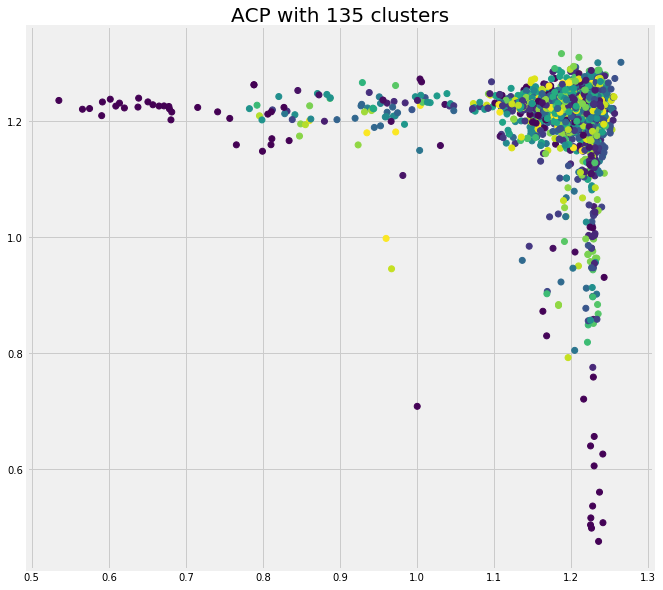

In [167]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

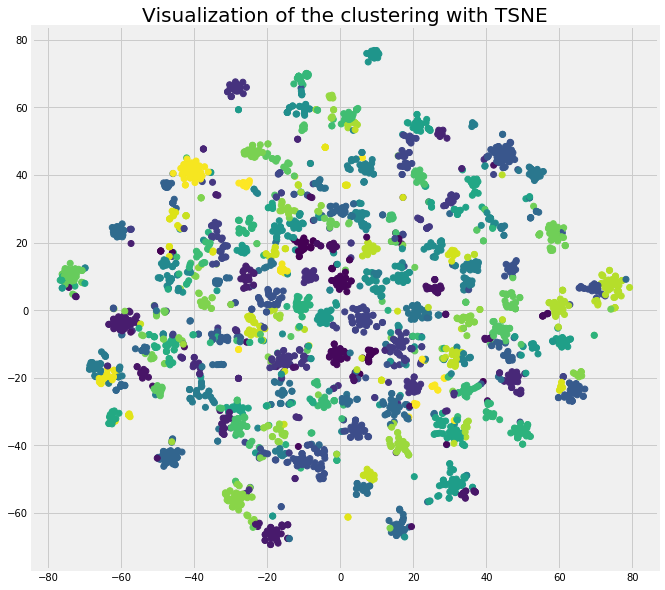

In [168]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

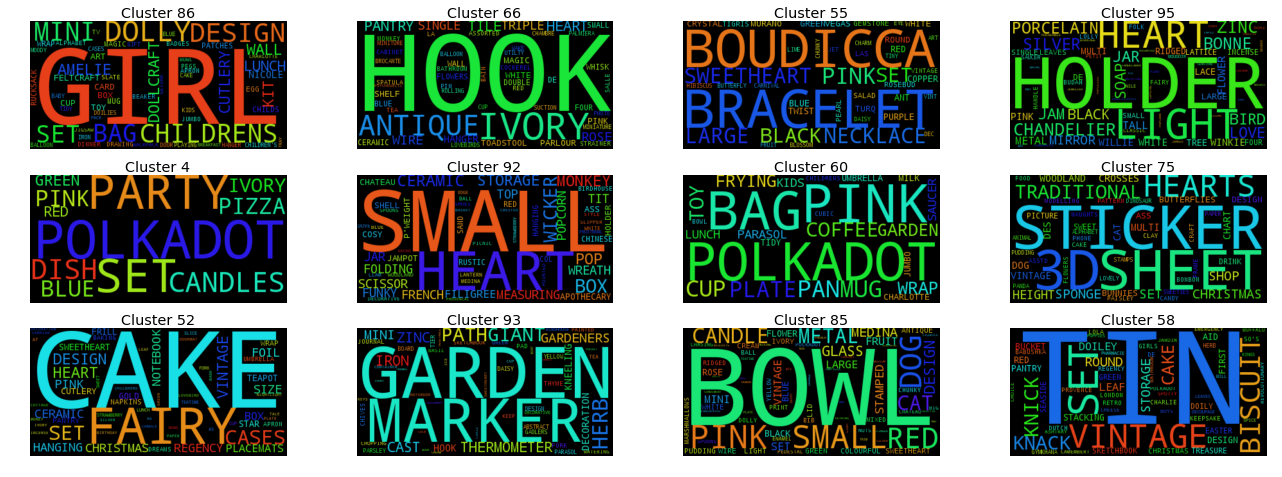

In [171]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

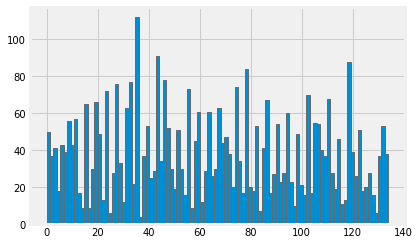

In [172]:
pd.Series(clusters).hist(bins=100)

In [173]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [174]:
dict_article_to_cluster

{'POLYESTER FILLER PAD 60x40cm': 129,
 'WOOD 2 DRAWER CABINET WHITE FINISH': 100,
 'GREEN/BLUE CERAMIC CANDLE HOLDER': 108,
 'LANTERN CREAM GAZEBO ': 39,
 'PACK OF 12 SPACEBOY TISSUES': 105,
 'RUBY DROP CHANDELIER EARRINGS': 10,
 'ASSORTED COLOUR SILK GLASSES CASE': 28,
 'CROCHET ROSE PURSE WITH SUEDE BACK': 27,
 'SILVER/BLACK ORBIT NECKLACE': 106,
 'BOYS ALPHABET IRON ON PATCHES': 64,
 'HEN HOUSE W CHICK STANDING': 3,
 'AQUA BERTIE GLASS BEAD BAG CHARM': 81,
 'CHERUB HEART DECORATION SILVER ': 69,
 'MULTICOLOUR HONEYCOMB FAN': 5,
 'WOODEN ADVENT CALENDAR CREAM': 59,
 'BUNNY WOODEN PAINTED WITH FLOWER ': 59,
 'FELTCRAFT HAIRBANDS PINK AND WHITE ': 120,
 'GREY FLORAL FELTCRAFT SHOULDER BAG': 98,
 'DECORATIVE VINTAGE COFFEE  BOX': 69,
 'MINI CAKE STAND WITH HANGING CAKES': 3,
 'PINK PARTY BAGS': 118,
 'RIBBON REEL SOCKS AND MITTENS': 45,
 'RED PURSE WITH PINK HEART': 0,
 'VICTORIAN SEWING KIT': 54,
 'SET 12 RETRO WHITE CHALK STICKS': 11,
 'GOLD/M.O.P PENDANT ORBIT NECKLACE': 16,
 'SILICO

In [177]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

# 2. Creating customer categories

### 2.1 Intermediate dataset grouped by invoices

In [178]:
cluster = df_cleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(df_cleaned["TotalPrice"], 0)
df2 = pd.concat([df_cleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()

In [180]:
cluster.head()

0    78
1    11
2    17
3    47
4    11
Name: Description, dtype: int64

In [191]:
df2_grouped.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,31.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,25.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]


df_grouped = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [193]:
custom_aggregation

{'Country': <function __main__.<lambda>>,
 'CustomerID': <function __main__.<lambda>>,
 'Quantity': 'sum',
 'TotalPrice': <function __main__.<lambda>>,
 'frequency': <function __main__.<lambda>>,
 'max_recency': <function __main__.<lambda>>,
 'min_recency': <function __main__.<lambda>>,
 'monetary_value': <function __main__.<lambda>>}

In [250]:
df_grouped.head()

,TotalPrice,Country,min_recency,frequency,monetary_value,max_recency,CustomerID,Quantity
InvoiceNo,,,,,,,,
536365,15.30,35,372.0,34,5327.79,373.0,17850,40
536366,11.10,35,372.0,34,5327.79,373.0,17850,12
536367,54.08,35,56.0,9,3095.80,373.0,13047,83
536368,25.50,35,56.0,9,3095.80,373.0,13047,15
536369,17.85,35,56.0,9,3095.80,373.0,13047,3


## 2.2 Final dataset grouped by customers

In [251]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()

In [252]:
df2_grouped_final.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,17.4,12.50,26.0,191.25,0.0,0.0,404.4,10.2,0.00,0.0,...,10.8,0.0,0.0,0.0,0.0,0.0,0.0,17.4,67.5,0.0
12348,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,42.9,107.88,0.0,12.75,0.0,0.0,16.5,0.0,17.88,0.0,...,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.8,0.0
12350,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,39.6,0.0,0.0,0.0,0.0,0.0,0.0,67.8,0.0,0.0


In [253]:
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)

In [254]:
df2_grouped_final.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347,0.004037,0.002900,0.006032,0.044374,0.0,0.0,0.093828,0.002367,0.000000,0.0,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
12348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12349,0.029433,0.074015,0.000000,0.008748,0.0,0.0,0.011320,0.000000,0.012267,0.0,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
12350,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


In [255]:
df2_grouped_final = df2_grouped_final.fillna(0)
df2_grouped_final.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12347,0.004037,0.002900,0.006032,0.044374,0.0,0.0,0.093828,0.002367,0.000000,0.0,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
12348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12349,0.029433,0.074015,0.000000,0.008748,0.0,0.0,0.011320,0.000000,0.012267,0.0,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
12350,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


In [256]:
df2_grouped_final.shape

(4335, 135)

In [257]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [258]:
df_grouped_final.head(5)

TotalPrice                    Country min_recency frequency  \
                  min    max       mean <lambda>    <lambda>  <lambda>   
CustomerID                                                               
12346             0.0    0.0   0.000000       35       325.0         1   
12347            13.2   45.0  23.308571       16         2.0         7   
12348            39.6  150.0  82.840000       12        75.0         4   
12349            15.0   15.0  15.000000       18        18.0         1   
12350            25.2   25.2  25.200000       24       310.0         1   

           monetary_value max_recency Quantity  
                 <lambda>    <lambda>      sum  
CustomerID                                      
12346                0.00       325.0    74215  
12347             4310.00       367.0     2458  
12348             1437.24       358.0     2332  
12349             1457.55        18.0      630  
12350              294.40       310.0      196

In [259]:
df_grouped_final.columns = ["min", "max", "mean", "country", "min_recency", "frequency","monetary_value","max_recency",  "quantity"]

In [260]:
df_grouped_final.head(5)

,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215
12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458
12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332
12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630
12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196


In [261]:
df2_grouped_final.head(5)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12347,0.004037,0.002900,0.006032,0.044374,0.0,0.0,0.093828,0.002367,0.000000,0.0,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
12348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12349,0.029433,0.074015,0.000000,0.008748,0.0,0.0,0.011320,0.000000,0.012267,0.0,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
12350,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


### 2.3 Clustering customers

In [262]:
X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()



In [263]:
X1

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   3.25000000e+02,   7.42150000e+04],
       [  1.32000000e+01,   4.50000000e+01,   2.33085714e+01, ...,
          4.31000000e+03,   3.67000000e+02,   2.45800000e+03],
       [  3.96000000e+01,   1.50000000e+02,   8.28400000e+01, ...,
          1.43724000e+03,   3.58000000e+02,   2.33200000e+03],
       ..., 
       [  1.27500000e+01,   2.55000000e+01,   1.91250000e+01, ...,
          1.76600000e+02,   1.26000000e+02,   1.03000000e+02],
       [  8.50000000e-01,   1.77000000e+01,   4.17187500e+00, ...,
          2.08893000e+03,   3.37000000e+02,   1.39500000e+03],
       [  1.02000000e+01,   4.50000000e+01,   2.68000000e+01, ...,
          1.83728000e+03,   2.01000000e+02,   1.58600000e+03]])

In [264]:
X2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00403712,  0.00290023,  0.00603248, ...,  0.00403712,
         0.01566125,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.07361268, ...,  0.        ,
         0.07219706,  0.        ],
       [ 0.00284835,  0.00951205,  0.        , ...,  0.03812478,
         0.01244656,  0.        ],
       [ 0.02870548,  0.05470043,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [265]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

In [266]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

('n_clusters =', 2)
('The average silhouette_score is :', 0.86402090483703242, 'with Std Scaling')
('n_clusters =', 3)
('The average silhouette_score is :', 0.25810097993263387, 'with Std Scaling')
('n_clusters =', 4)
('The average silhouette_score is :', 0.48626810770394208, 'with Std Scaling')
('n_clusters =', 5)
('The average silhouette_score is :', 0.3038851809398796, 'with Std Scaling')
('n_clusters =', 6)
('The average silhouette_score is :', 0.3919507957886732, 'with Std Scaling')
('n_clusters =', 7)
('The average silhouette_score is :', 0.4000084250148, 'with Std Scaling')
('n_clusters =', 8)
('The average silhouette_score is :', 0.40657000101779067, 'with Std Scaling')
('n_clusters =', 9)
('The average silhouette_score is :', 0.40999170856462425, 'with Std Scaling')
('n_clusters =', 10)
('The average silhouette_score is :', 0.40931080021638022, 'with Std Scaling')
('n_clusters =', 11)
('The average silhouette_score is :', 0.40827115316968021, 'with Std Scaling')


In [267]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

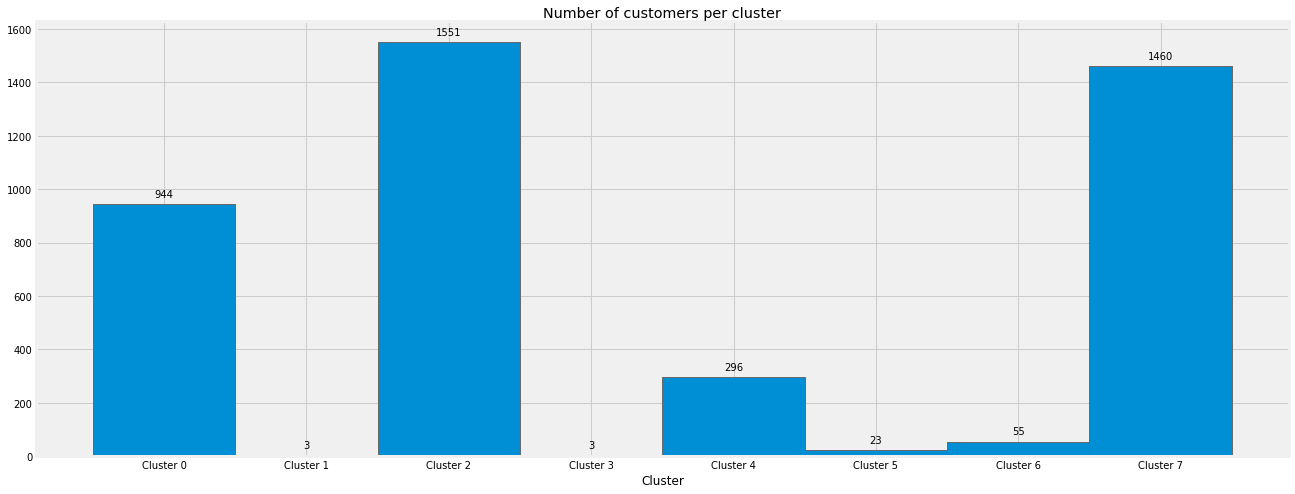

In [268]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [269]:
df_grouped_final.head()

,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215
12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458
12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332
12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630
12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196


In [270]:
df_grouped_final["cluster"] = clusters

In [271]:
df_grouped_final.head()

,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,cluster
CustomerID,,,,,,,,,,
12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215,5
12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458,4
12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332,4
12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630,4
12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196,0


In [272]:
df_grouped_final.cluster.unique()

array([5, 4, 0, 2, 7, 6, 1, 3], dtype=int64)

In [273]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215,5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458,4,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332,4,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630,4,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196,0,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


In [274]:
final_dataset_V2 = final_dataset.reset_index()


In [275]:
final_dataset_V2.head()

,CustomerID,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
2,12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
4,12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


In [276]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

### 2.3.1. Cluster 0

In [277]:
final_dataset_V2[final_dataset_V2['cluster']==0].tail()

,CustomerID,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
4310,18250,14.85,14.85,14.850,35,310.0,1,342.92,310.0,199,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4316,18260,15.00,39.60,25.095,35,172.0,6,2595.00,358.0,1478,...,0.0,0.0,0.012177,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4322,18269,18.60,18.60,18.600,35,366.0,1,138.90,366.0,76,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4330,18280,23.70,23.70,23.700,35,277.0,1,180.60,277.0,45,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4331,18281,5.04,5.04,5.040,35,180.0,1,80.82,180.0,54,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
final_dataset[final_dataset['cluster']==0].mean()

min                23.449968
max                34.865318
mean               28.683498
country            34.772246
min_recency       250.860169
frequency           1.628178
monetary_value    442.315265
max_recency       281.849576
quantity          242.724576
cluster             0.000000
Cluster_0           0.008400
Cluster_1           0.007660
Cluster_2           0.004964
Cluster_3           0.031578
Cluster_4           0.001525
Cluster_5           0.002567
Cluster_6           0.012576
Cluster_7           0.006327
Cluster_8           0.003333
Cluster_9           0.000442
Cluster_10          0.000741
Cluster_11          0.009261
Cluster_12          0.010535
Cluster_13          0.001181
Cluster_14          0.003716
Cluster_15          0.015353
Cluster_16          0.000463
Cluster_17          0.005019
Cluster_18          0.009685
Cluster_19          0.002768
                     ...    
Cluster_105         0.014589
Cluster_106         0.000546
Cluster_107         0.008751
Cluster_108   

In [279]:
temp_final_df = final_dataset.reset_index()

In [280]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [281]:
cust0

[12350L,
 12354L,
 12377L,
 12410L,
 12510L,
 12515L,
 12547L,
 12548L,
 12551L,
 12565L,
 12639L,
 12725L,
 12733L,
 12764L,
 12785L,
 12790L,
 12791L,
 12792L,
 12793L,
 12797L,
 12809L,
 12811L,
 12815L,
 12821L,
 12829L,
 12831L,
 12834L,
 12837L,
 12840L,
 12845L,
 12852L,
 12855L,
 12857L,
 12868L,
 12872L,
 12873L,
 12878L,
 12881L,
 12888L,
 12891L,
 12897L,
 12902L,
 12915L,
 12929L,
 12945L,
 12956L,
 12967L,
 12974L,
 12976L,
 12982L,
 12988L,
 12999L,
 13002L,
 13005L,
 13008L,
 13011L,
 13033L,
 13037L,
 13043L,
 13044L,
 13052L,
 13059L,
 13060L,
 13062L,
 13065L,
 13070L,
 13072L,
 13080L,
 13085L,
 13093L,
 13101L,
 13108L,
 13120L,
 13121L,
 13132L,
 13133L,
 13144L,
 13151L,
 13161L,
 13166L,
 13185L,
 13187L,
 13216L,
 13221L,
 13223L,
 13226L,
 13227L,
 13229L,
 13235L,
 13239L,
 13243L,
 13253L,
 13261L,
 13262L,
 13284L,
 13294L,
 13295L,
 13299L,
 13300L,
 13304L,
 13328L,
 13339L,
 13341L,
 13343L,
 13345L,
 13357L,
 13358L,
 13368L,
 13369L,
 13370L,
 13382L,
 

In [282]:
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity              8.199685
UnitPrice             3.367471
QuantityCanceled      0.154917
TotalPrice           14.942228
frequency             2.652591
min_recency         236.827083
monetary_value      862.967311
dtype: float64

In [283]:
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    231
REGENCY CAKESTAND 3 TIER              188
PARTY BUNTING                         139
ASSORTED COLOUR BIRD ORNAMENT         131
REX CASH+CARRY JUMBO SHOPPER          112
JAM MAKING SET WITH JARS              109
NATURAL SLATE HEART CHALKBOARD        104
SET OF 3 CAKE TINS PANTRY DESIGN      101
HEART OF WICKER SMALL                  98
HEART OF WICKER LARGE                  87
Name: Description, dtype: int64

In [284]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [285]:
cluster0_grouped.head()

,Country,RFMScore
CustomerID,,
12350,24,444
12354,30,442
12377,32,432
12410,32,433
12510,30,332


In [286]:
cluster0_grouped['RFMScore'].value_counts()

444    398
443    181
433     95
434     56
432     49
422     45
423     34
442     30
424     12
421     10
411      7
412      6
431      4
441      3
322      3
414      2
323      2
332      2
333      2
413      1
321      1
334      1
Name: RFMScore, dtype: int64

In [287]:
cluster0_grouped['Country'].value_counts()

35    915
26      6
32      5
30      5
23      2
18      2
36      1
34      1
33      1
31      1
28      1
25      1
24      1
21      1
20      1
Name: Country, dtype: int64

In [288]:
cluster0['Month'].value_counts()

12    5487
3     4336
5     3754
4     3597
2     3393
1     3265
6     3118
7      980
8       14
Name: Month, dtype: int64

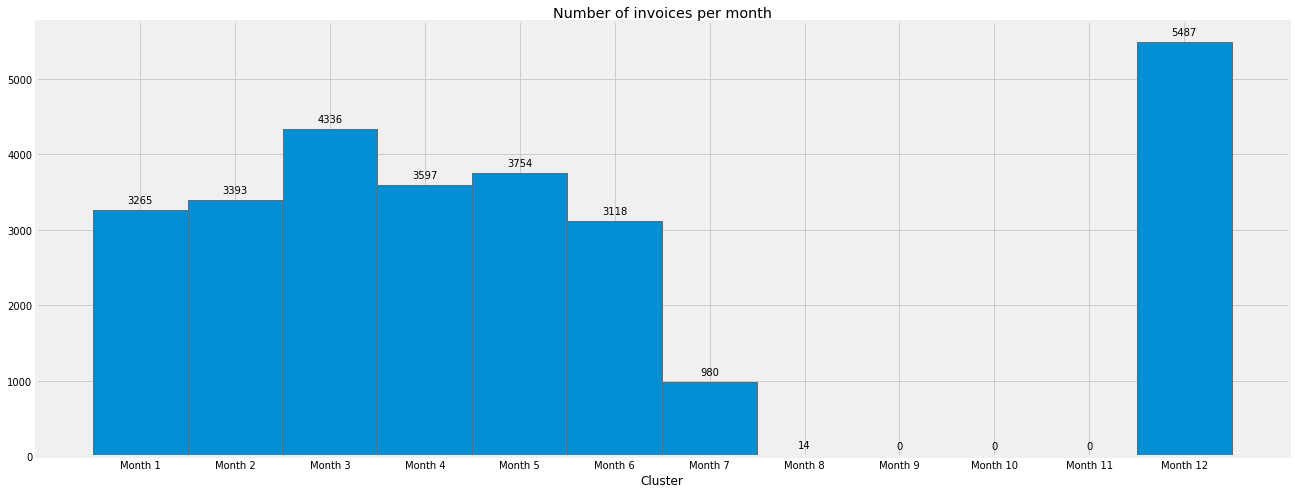

In [289]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [298]:
cust1 = list(temp_final_df[temp_final_df['cluster']==1]['CustomerID'])

In [299]:
cust1

[13135L, 15195L, 18087L]

In [300]:
cluster1= df_cleaned[df_cleaned['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity            3203.333333
UnitPrice              1.430000
QuantityCanceled       0.000000
TotalPrice          3386.640000
frequency              1.000000
min_recency          162.666667
monetary_value      3386.640000
dtype: float64

In [301]:
cluster1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,monetary_value,min_recency,max_recency,frequency,RFMScore,Month,Weekday,Day,Hour
237366,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,35,0,3202.92,3202.92,290.0,290.0,1,441,2,1,22,10
314588,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,35,0,3096.00,3096.00,196.0,196.0,1,441,5,4,27,10
396098,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195,35,0,3861.00,3861.00,2.0,2.0,1,141,12,2,7,12


In [302]:
cluster1['Description'].value_counts()[:10]

METAL SIGN TAKE IT OR LEAVE IT     1
EMPIRE DESIGN ROSETTE              1
SMALL POPCORN HOLDER               1
Name: Description, dtype: int64

In [304]:
cust2 = list(temp_final_df[temp_final_df['cluster']==2]['CustomerID'])

In [305]:
cust2

[12352L,
 12356L,
 12363L,
 12409L,
 12421L,
 12433L,
 12451L,
 12456L,
 12457L,
 12458L,
 12462L,
 12483L,
 12484L,
 12502L,
 12507L,
 12539L,
 12540L,
 12541L,
 12545L,
 12557L,
 12576L,
 12596L,
 12597L,
 12676L,
 12744L,
 12747L,
 12749L,
 12757L,
 12758L,
 12766L,
 12775L,
 12778L,
 12779L,
 12782L,
 12808L,
 12820L,
 12826L,
 12830L,
 12836L,
 12838L,
 12839L,
 12841L,
 12842L,
 12843L,
 12849L,
 12853L,
 12854L,
 12867L,
 12875L,
 12877L,
 12886L,
 12909L,
 12910L,
 12913L,
 12916L,
 12921L,
 12924L,
 12928L,
 12933L,
 12935L,
 12937L,
 12939L,
 12942L,
 12944L,
 12947L,
 12948L,
 12949L,
 12951L,
 12955L,
 12957L,
 12963L,
 12970L,
 12989L,
 12990L,
 12993L,
 12994L,
 12997L,
 13000L,
 13001L,
 13004L,
 13012L,
 13013L,
 13014L,
 13015L,
 13018L,
 13021L,
 13026L,
 13030L,
 13034L,
 13035L,
 13038L,
 13046L,
 13047L,
 13048L,
 13049L,
 13050L,
 13055L,
 13064L,
 13068L,
 13069L,
 13077L,
 13078L,
 13081L,
 13082L,
 13090L,
 13092L,
 13094L,
 13097L,
 13098L,
 13102L,
 13104L,
 

In [306]:
cluster2 = df_cleaned[df_cleaned['CustomerID'].isin(cust2)]
cluster2[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity              10.068186
UnitPrice              2.894204
QuantityCanceled       0.131698
TotalPrice            17.091991
frequency             11.165553
min_recency           24.450899
monetary_value      5513.891441
dtype: float64

In [308]:
cluster2['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1355
JUMBO BAG RED RETROSPOT               1090
REGENCY CAKESTAND 3 TIER               980
PARTY BUNTING                          936
ASSORTED COLOUR BIRD ORNAMENT          932
LUNCH BAG RED RETROSPOT                909
LUNCH BAG  BLACK SKULL.                769
SET OF 3 CAKE TINS PANTRY DESIGN       734
LUNCH BAG PINK POLKADOT                690
LUNCH BAG CARS BLUE                    685
Name: Description, dtype: int64

In [309]:
temp_final_df.head()

,CustomerID,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
2,12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
4,12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


# 3. Testing models for prediction

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import datetime as dt
import pickle
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [311]:
new_df = pd.read_csv("final_dataset_V2.csv")

In [312]:
new_df.head()

,CustomerID,min,max,mean,country,min_recency,frequency,monetary_value,max_recency,quantity,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,35,325.0,1,0.00,325.0,74215,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,12347,13.2,45.0,23.308571,16,2.0,7,4310.00,367.0,2458,...,0.002506,0.0,0.0,0.0,0.0,0.0,0.0,0.004037,0.015661,0.0
2,12348,39.6,150.0,82.840000,12,75.0,4,1437.24,358.0,2332,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,12349,15.0,15.0,15.000000,18,18.0,1,1457.55,18.0,630,...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043772,0.0
4,12350,25.2,25.2,25.200000,24,310.0,1,294.40,310.0,196,...,0.134511,0.0,0.0,0.0,0.0,0.0,0.0,0.230299,0.000000,0.0


In [313]:
new_df.cluster.head()

0    5
1    4
2    4
3    4
4    0
Name: cluster, dtype: int64

In [314]:
X = new_df.drop(columns=['CustomerID', 'cluster']) 
y = new_df['cluster'].values

In [315]:
scaler = StandardScaler() # create scaler object

X_scaled = scaler.fit_transform(X)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0, stratify=y) # Do 80/20 split

# 3.1 Testing classic models

In [317]:
from sklearn.dummy import DummyClassifier

In [318]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [319]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

('Baseline accuracy', 29.181084198385239)


# 3.1.2 Linear models

In [320]:
from sklearn.linear_model import LogisticRegression, SGDClassifier


In [321]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

('LogisticRegression_classifier accuracy:', 95.617070357554795)


In [322]:
# SGD Classifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
print("SGDClassifier accuracy:", (SGD.score(X_test, y_test))*100)

('SGDClassifier accuracy:', 94.117647058823522)


# 3.1.3 SVM

In [323]:
# Linear SVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print("LinearSVC accuracy:", (svc.score(X_test, y_test))*100)

('LinearSVC accuracy:', 94.925028835063443)


# 3.2 Random Forest

In [324]:
from sklearn.ensemble import RandomForestClassifier

In [325]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [326]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [327]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000, criterion='entropy', max_depth=6, max_features='auto')

In [328]:
rfc.fit(X_train, y_train)
print("Accuracy for Random Forest Classifier:", (rfc.score(X_test, y_test)*100))

('Accuracy for Random Forest Classifier:', 94.00230680507498)


In [329]:
y_pred = rfc.predict(X_test)

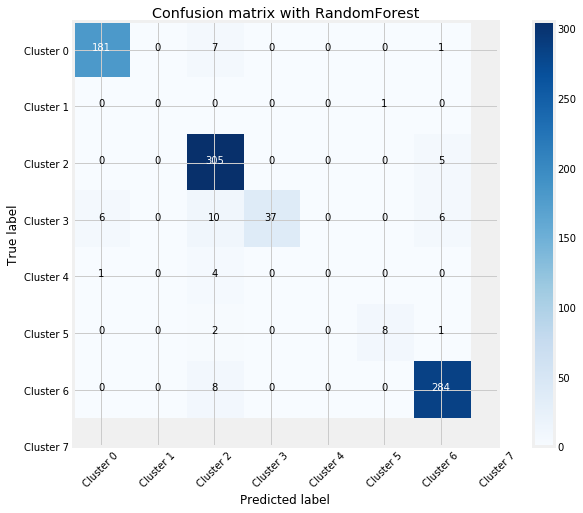

In [331]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ["Cluster {}".format(x) for x in range(8)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')


# 3.3 XGBoost

In [334]:
import xgboost

In [333]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [335]:
xgb = xgboost.XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000,
                                  colsample_bytree = 0.6, gamma = 0.5, max_depth = 7,
                                  min_child_weight = 1, subsample=0.8, n_jobs=-1, scoring='accuracy')

In [337]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='accuracy', seed=None,
       silent=True, subsample=0.8)

In [338]:
print("Accuracy for XGBoost : ", (xgb.score(X_test, y_test))*100)

('Accuracy for XGBoost : ', 98.039215686274503)


In [339]:
y_pred = xgb.predict(X_test)

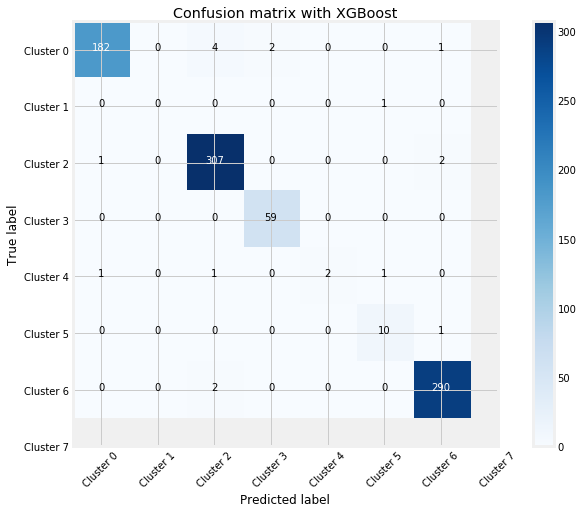

In [340]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')